In [30]:
import torch
print(torch.__version__)


OSError: [WinError 1114] A dynamic link library (DLL) initialization routine failed. Error loading "C:\Users\Owner\anaconda3\Lib\site-packages\torch\lib\c10.dll" or one of its dependencies.

In [27]:
import numpy as np
import pandas as pd #extracted dataset
import yfinance as yf #API used to get data from yahooo finance
import matplotlib.pyplot as plt #visualise the chart

import torch
import torch.nn as nn
import torch.optim as optim


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

OSError: [WinError 1114] A dynamic link library (DLL) initialization routine failed. Error loading "C:\Users\Owner\anaconda3\Lib\site-packages\torch\lib\c10.dll" or one of its dependencies.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:

ticker = 'SPY'
df = yf.download(ticker, '2025-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2025-01-02,577.854248,584.268911,573.762285,582.549116,50204000
2025-01-03,585.079346,585.721765,579.623396,580.710665,37888500
2025-01-06,588.449768,592.739421,586.710186,589.349240,47679400
2025-01-07,581.797913,590.812054,579.969409,590.485867,60393100
2025-01-08,582.647827,583.725202,578.407643,581.867018,47304700
...,...,...,...,...,...
2025-12-16,676.869934,679.073445,672.991380,677.228859,122030600
2025-12-17,669.421936,678.435280,669.222513,677.886913,110625200


<Axes: xlabel='Date'>

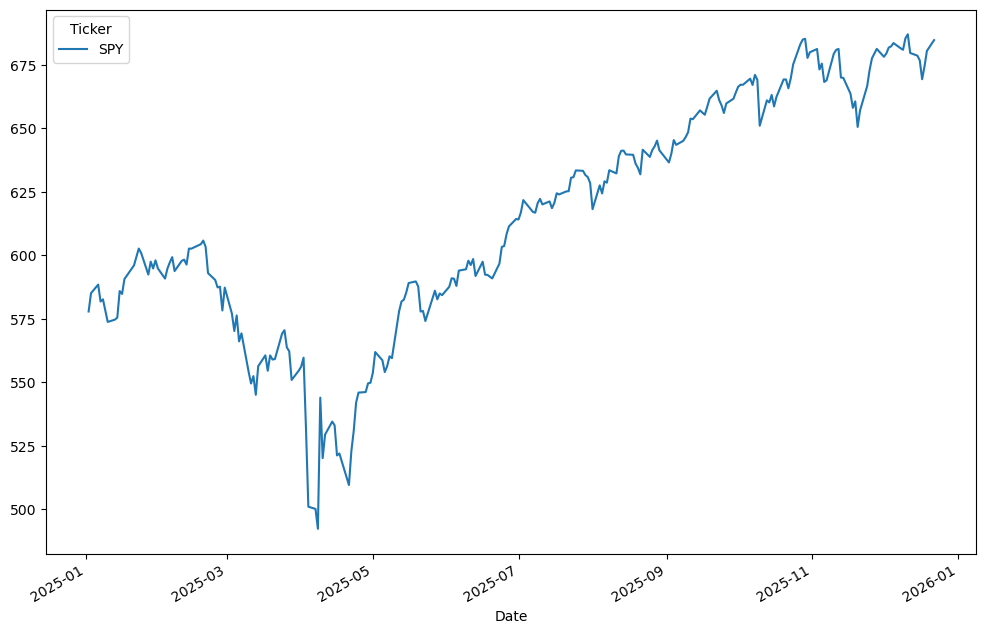

In [5]:
df.Close.plot(figsize=(12, 8))

In [ ]:
scaler = StandardScaler()

df['Close'] = scaler.fit_transformdf(['Close'])

In [7]:
df.Close

Ticker,SPY
Date,
2025-01-02,577.854248
2025-01-03,585.079346
2025-01-06,588.449768
2025-01-07,581.797913
2025-01-08,582.647827
...,...
2025-12-16,676.869934
2025-12-17,669.421936
2025-12-18,674.476929


In [22]:
seq_length = 30
data = []

for i in range(len(df) - seq_length):
    data.append(df.Close[i:i+seq_length])

data = np.array(data)


In [13]:
data

array([[[577.85424805],
        [585.0793457 ],
        [588.44976807],
        ...,
        [596.35687256],
        [602.65289307],
        [602.62335205]],

       [[585.0793457 ],
        [588.44976807],
        [581.7979126 ],
        ...,
        [602.65289307],
        [602.62335205],
        [604.39251709]],

       [[588.44976807],
        [581.7979126 ],
        [582.64782715],
        ...,
        [602.62335205],
        [604.39251709],
        [605.8157959 ]],

       ...,

       [[675.58374023],
        [668.33514404],
        [668.99316406],
        ...,
        [678.72442627],
        [676.86993408],
        [669.42193604]],

       [[668.33514404],
        [668.99316406],
        [679.43237305],
        ...,
        [676.86993408],
        [669.42193604],
        [674.47692871]],

       [[668.99316406],
        [679.43237305],
        [680.98773193],
        ...,
        [669.42193604],
        [674.47692871],
        [680.59002686]]])

In [29]:
train_size = int(0.8 * len(data))

X_train = torch.from_numpy(data[:train_size, :-1, :]).type(torch.Tensor).to(device)
y_train = torch.from_numpy(data[:train_size, :-1, :]).type(torch.Tensor).to(device)
X_test = torch.from_numpy(data[train_size:, :-1, :]).type(torch.Tensor).to(device)
y_test = torch.from_numpy(data[train_size:, :-1, :]).type(torch.Tensor).to(device)

NameError: name 'torch' is not defined

In [ ]:
class PredictionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(PredictionModel, self).__init__()
        
        self.num_layers = num_layers
        self.hidden = hideen_dim
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device=device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device=device)
        
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        
        return out

In [ ]:
model = PredictionModel(input_dim=1, hidden_dim=32, num_layers=2, ouput_dim=1).to(device)

In [ ]:
criteria = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [28]:
num_epochs = 200

for i in range(num_epochs):
    y_train_pred = model(X_train)
    
    loss = criterion(y_train_pred, y_train)
    
    if i % 25 == 0:
        print(i, loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

NameError: name 'model' is not defined